# Introduction: Graphing NYC Bike Paths

The objective of this notebook is to produce an animated graph showing the growth of NYC bike paths over time. We'll start with open data from NYC and convert it into a format that we can plot with Plotly.

In [2]:
import geopandas as gpd

gdf = gpd.read_file('20180906_current_bike_network.shp')

Our data is in a geodataframe which is like a pandas dataframe but includes specific geographic capabilities. The geographic information is stored in `geometry`.

In [3]:
gdf.head()

OBJECTID  segmentmil SegmentID  LaneMiles  BikeID   Shape_Leng  OBJECTID_1  \
0         1    0.049849     33547   0.049849    65.0   263.204281          64   
1         2    0.051508     22630   0.051508   916.0   271.962807         908   
2         3    0.069931    299123   0.069931   972.0   369.238067         964   
3         4    0.192899     34170   0.192899   558.0  1018.506071         550   
4         5    0.051184     43043   0.051184  1476.0   270.250237        1468   

      street  boro facilitycl  ... onoffst allclasses    instdate     moddate  \
0       9 AV   1.0          I  ...      ON          I  2008-09-25  2008-09-25   
1       3 AV   3.0         II  ...      ON         II  1980-07-01  1980-07-01   
2   ADAMS ST   3.0        III  ...      ON        III  2006-06-01  2017-07-01   
3    W 39 ST   1.0        III  ...      ON        III  2012-09-12  2012-09-12   
4  THROOP AV   3.0         II  ...      ON         II  2003-06-01  2003-06-01   

              comments bikedir lanecount ft_facilit      tf_facilit  \
0                 None       L       1.0       None  Protected Path   
1                 None       R       1.0   Standard            None   
2  downgrade to shared       L       1.0       None        Sharrows   
3                 None       R       1.0   Sharrows            None   
4                 None       L       1.0       None        Standard   

                                            geometry  
0  LINESTRING (984139.580 211708.658, 984267.464 ...  
1  LINESTRING (987723.185 185455.076, 987577.506 ...  
2  LINESTRING (987438.313 193342.970, 987423.019 ...  
3  LINESTRING (989161.027 213097.044, 988270.651 ...  
4  LINESTRING (1000475.801 189124.357, 1000516.65...  

[5 rows x 23 columns]

We'll fill in the missing values in this column so we can color the map by the type of path.

In [4]:
gdf['tf_facilit'] = gdf['tf_facilit'].fillna('unknown')
gdf['ft_facilit'] = gdf['ft_facilit'].fillna('unknown')

Objective:
* Routes over time.
* When were the most routes made
* Future projections for routes
* Interactive plot of routes

# First Plot

Geopandas makes it very easy to quickly make a geographic plot. Here is our first attempt.

In /Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/josean

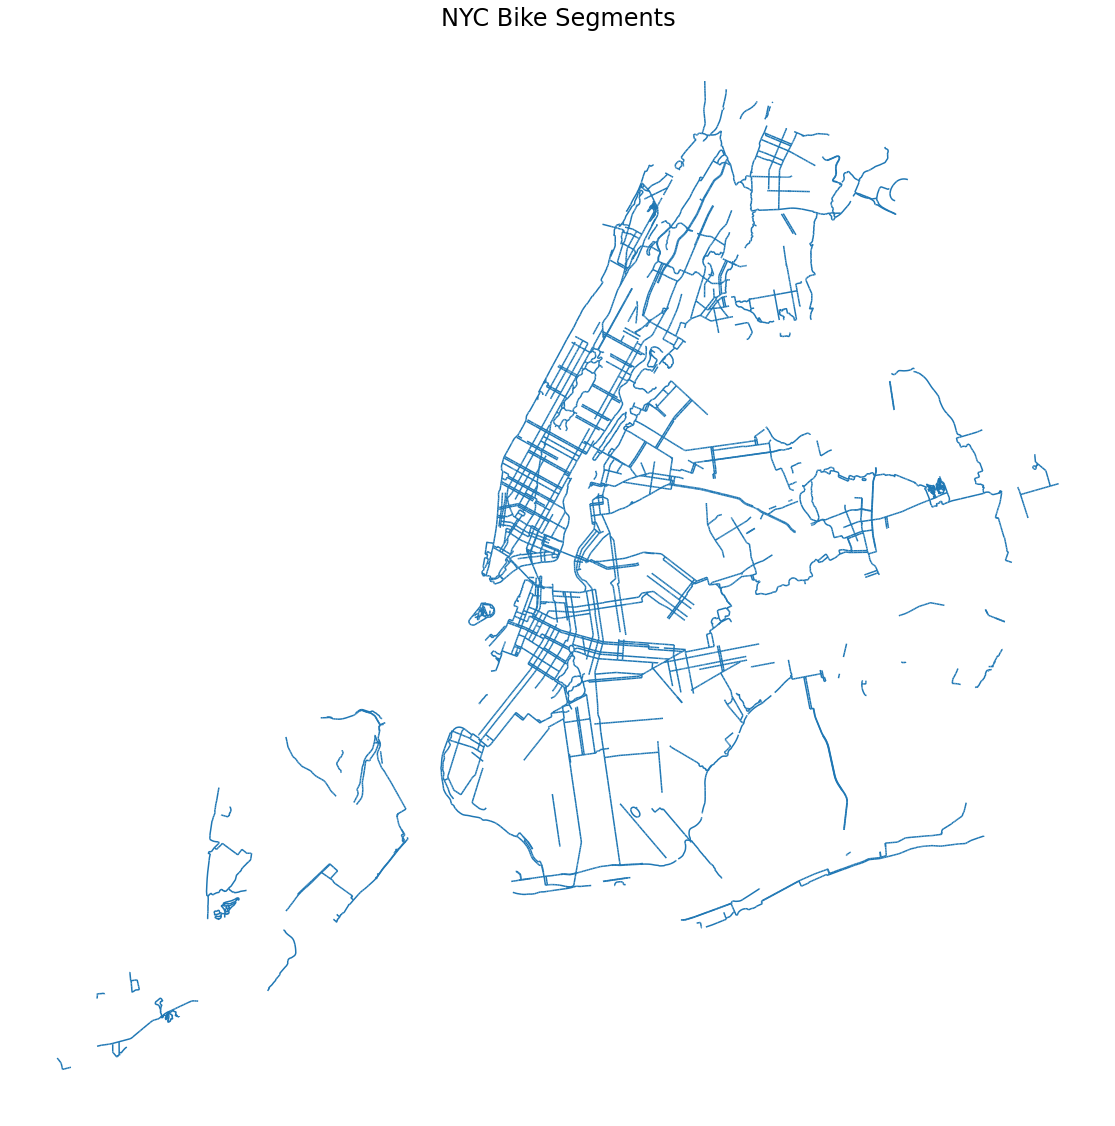

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.figure(figsize=(20, 20))
ax = plt.gca()
_ = gdf.plot(ax=ax)
_ = ax.set_title('NYC Bike Segments', size=24)
_ = ax.axis('off')

We can color by any of the variables, for example, the facility type.

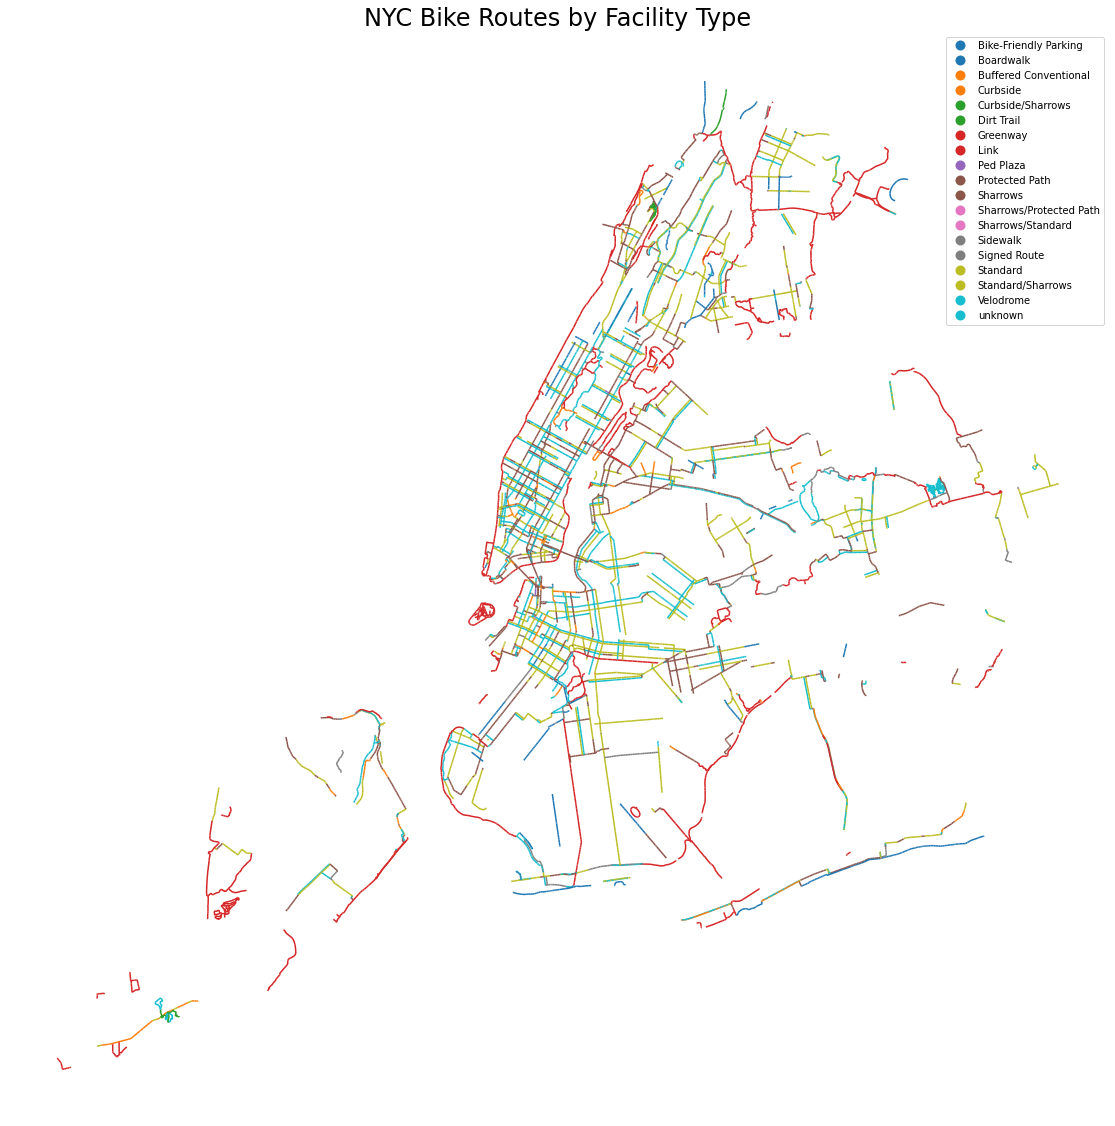

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.figure(figsize=(20, 20))
ax = plt.gca()
_ = gdf.plot(column='tf_facilit', ax=ax, legend=True)
_ = ax.set_title('NYC Bike Routes by Facility Type', size=24)
_ = ax.axis('off')

# Adding a Basemap

The next step is to add a basemap. This is a basic map underlying our map showing geography, infrastructure, political boundaries, terrain, etc. The information we place on top is a layer.

## Change the Coordinate Reference System

The coordinate reference system (crs) refers to the encoding of the geographic information (in `geometry`). There are two types of crs:

* projected: used for projecting latitude and longitude coordinates onto a 2D surface
* unprojected: latitude and longitude coordinates

The geodataframe is currently in a projected crs. To use `contextily`, we need to use the epsg: 3857 crs which is also projected. To get the latitude and longitude, we can convert to epsg:4327.

In [7]:
# Make sure we are using the correct coordinate reference system
gdf = gdf.to_crs(epsg=3857)
gdf.crs

/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


{'init': 'epsg:3857', 'no_defs': True}

We can see the difference in coordinate systems by looking at the coordinates.

In [8]:
list(gdf['geometry'].iloc[0].coords)

[(-8237686.68052387, 4975208.3720366275),
 (-8237635.302419021, 4975301.15346907)]

These are x-y coordinates. We can now convert to latitude and longitude and view the coordinates.

In [9]:
unprojected_gdf = gdf.to_crs(epsg=4327)
unprojected_gdf.crs

/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


{'init': 'epsg:4327', 'no_defs': True}

In [10]:
list(unprojected_gdf['geometry'].iloc[0].coords)

[(-74.00039850902397, 40.74776789154447),
 (-73.99993697165543, 40.74839931726863)]

Now our coordinates are in (longitude, latitude) pairs corresponding to a Mercator Project. We'll use these coordinates later for working with plotly. 

Now, we can get back to adding a basemap with contextily.

In [12]:
%pip install contextily

     |████████████████████████████████| 17.4 MB 5.9 MB/s eta 0:00:01    |███████████                     | 6.0 MB 2.2 MB/s eta 0:00:06     |████████████████████████████▊   | 15.7 MB 1.2 MB/s eta 0:00:02
     |████████████████████████████████| 111 kB 10.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  after removing the cwd from sys.path.
/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.


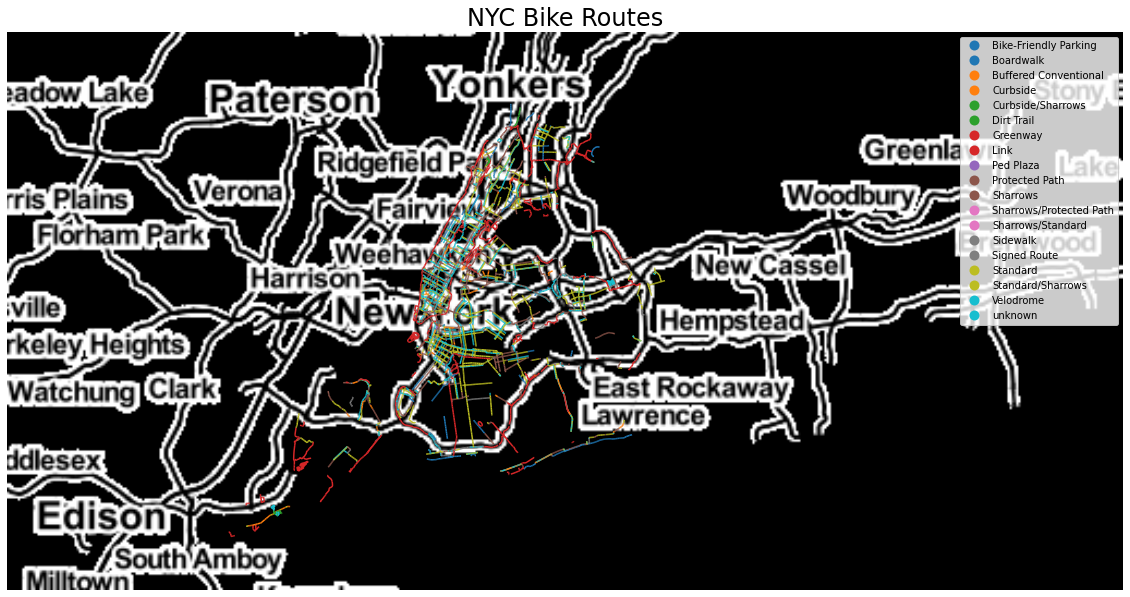

In [13]:
import contextily as ctx

def plot_with_basemap(
    gdf, column, zoom, url=ctx.sources.ST_TONER_HYBRID
):
    """
    Plot a geodataframe with a basemap. The geodata frame must be in epsg:3857 crs.
    """
    gdf = gdf.copy()
    
    
    # Create the figure
    _ = plt.figure(figsize=(20, 20))
    ax = plt.gca()
    _ = gdf.plot(column=column, ax=ax, legend=True)
    _ = ax.set_title("NYC Bike Routes", size=24)
    
    # Get the bounds of the axes
    xmin, xmax, ymin, ymax = ax.axis()
    
    # Retrieve the image from the url
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation="bilinear")
    _ = ax.axis("off")
    plt.show()
    
plot_with_basemap(gdf, column='tf_facilit', zoom=9)

## Interactive Basemap

To get an idea of the different basemaps, we can make our function interactive. This will let us rapidly cycle through different basemaps.

interactive(children=(IntSlider(value=10, description='zoom', max=30, min=-10), Dropdown(description='style', …

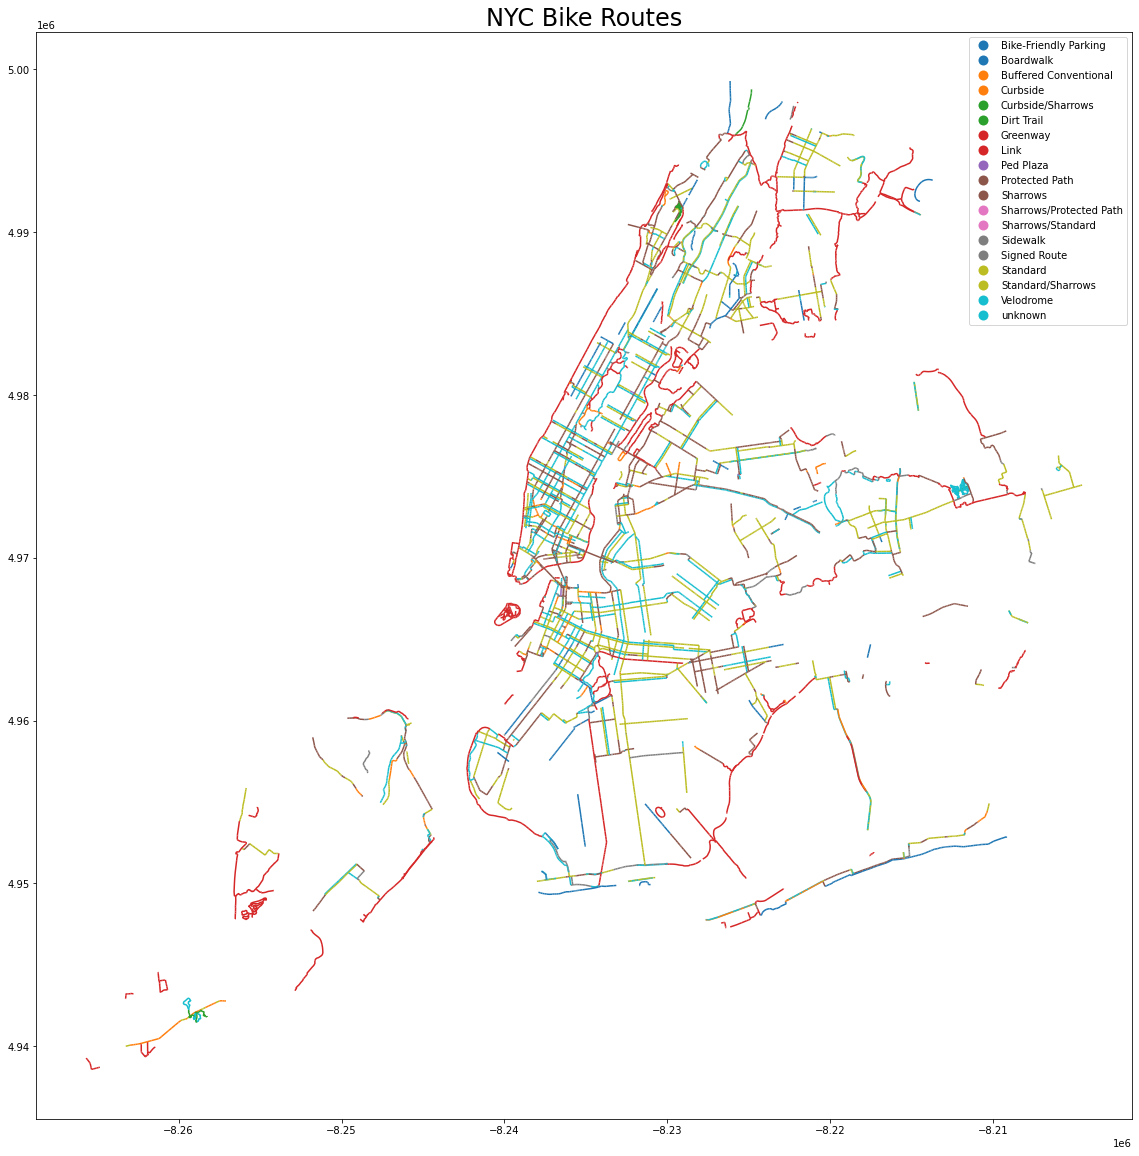

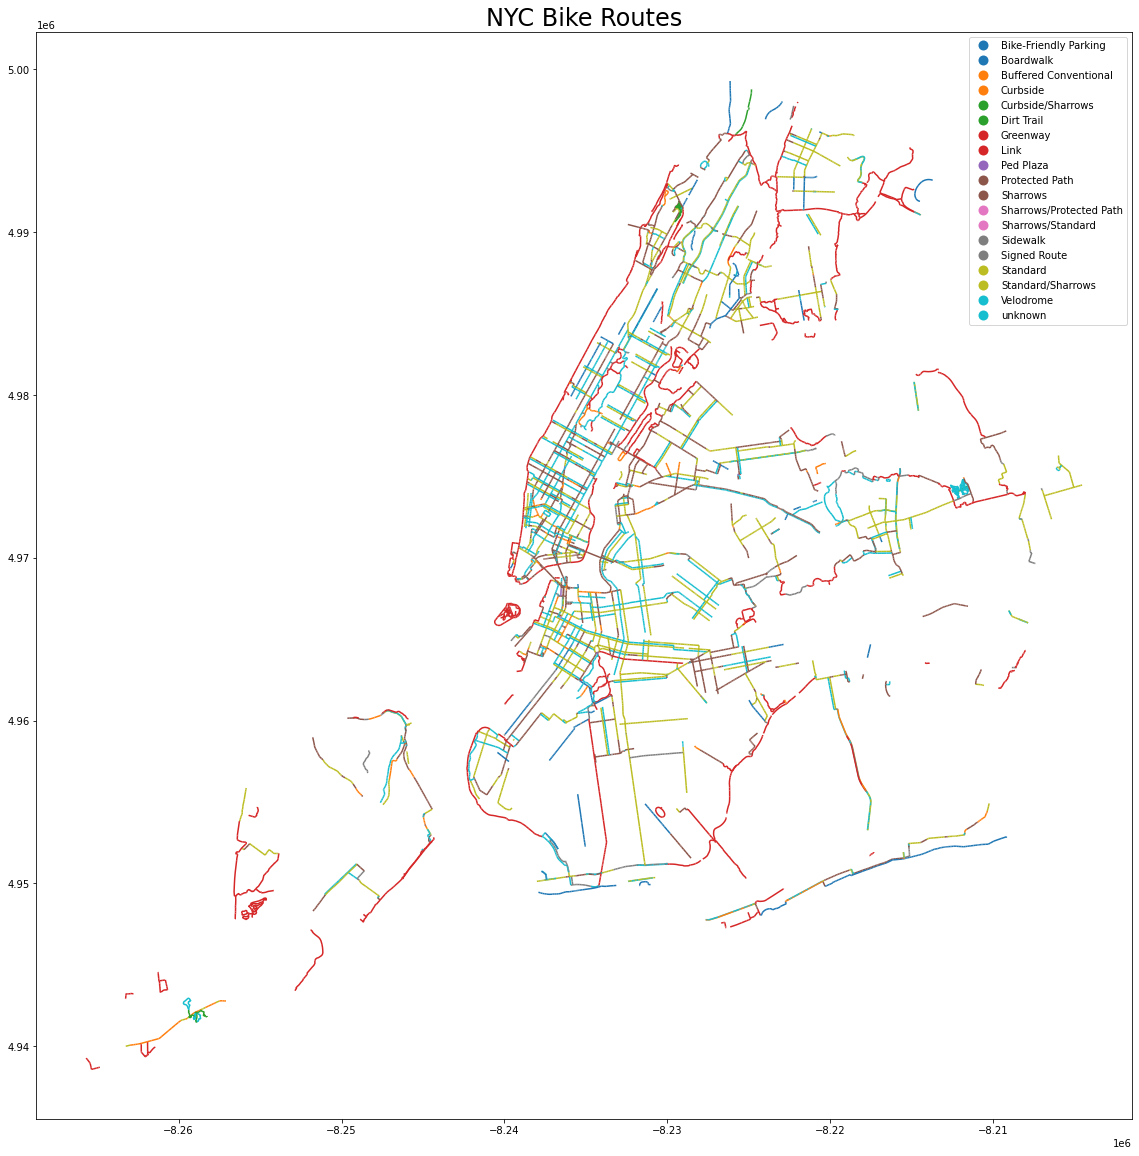

In [14]:
from ipywidgets import interact_manual

@interact_manual
def plot_with_basemap(
    zoom=10,
    style=[
        "ST_TERRAIN",
        "ST_TERRAIN_BACKGROUND",
        "ST_TERRAIN_LABELS",
        "ST_TERRAIN_LINES",
        "ST_TONER",
        "ST_TONER_BACKGROUND",
        "ST_TONER_HYBRID",
        "ST_TONER_LINES",
        "ST_TONER_LITE",
        "ST_WATERCOLOR",
    ],
):
    # Create the figure
    _ = plt.figure(figsize=(20, 20))
    ax = plt.gca()
    _ = gdf.plot(column="tf_facilit", ax=ax, legend=True)
    _ = ax.set_title("NYC Bike Routes", size=24)

    # Get the bounds of the axes
    xmin, xmax, ymin, ymax = ax.axis()

    # Retrieve the image from the url
    basemap, extent = ctx.bounds2img(
        xmin, ymin, xmax, ymax, zoom=zoom, url=getattr(ctx.sources, style)
    )
    ax.imshow(basemap, extent=extent, interpolation="bilinear")
    _ = ax.axis("off")
    plt.show()

# Make Routes

The data currently contains `segments` for each bike route. I'm not entirely sure what a segment is supposed to represent, but it makes more sense to me if we group together routes based on `fromstreet` and `tostreet`. We also want to keep track of the direction, given in `bikedir`. 

In [15]:
gdf['route'] = gdf['fromstreet'] + ' to ' + gdf['tostreet'] + ' ' + gdf['bikedir']
gdf['route'].value_counts()

E 161 ST to VAN CORTLANDT AVE E L     142
E 161 ST to VAN CORTLANDT AVE E R     142
BATTERY PARK GREENWAY to W 59 ST 2     86
EMMONS AV to DIVISION AV 2             85
BEACH 126 St to BEACH 39 ST 2          81
                                     ... 
FRESH POND RD to 60 LN L                1
MADISON AV to 5 Av L                    1
W 48 ST to W 47 ST L                    1
SACKETT ST to HAMILTON AV 2             1
CHEROKEE PL to YORK AVE L               1
Name: route, Length: 2047, dtype: int64

Let's take a look at the longest routes.

In [16]:
gdf.groupby('route')['LaneMiles'].sum().sort_values().tail()

route
SEA BREEZE AV to CHURCH AV 2           9.713069
BATTERY PARK GREENWAY to W 59 ST 2     9.999883
BAY PKWY to SHORE RD 2                10.868406
BRIGHAM ST to KINGS-QN CNTY BNDY 2    11.727482
EMMONS AV to DIVISION AV 2            13.018540
Name: LaneMiles, dtype: float64

## Combine Segments into Routes

To combine the segments into routes, we simply need to join together the individual line segments. The info is the same, it will just be represented as routes instead of segments.

In [20]:

#plt.rcParams['font.size'] = 20
#ax = gdf.set_index('instdate')['cumulative_miles'].plot(title='Cumulative Growth in NYC Bike Line Mileage', figsize=(10, 10))
#ax.set_ylabel('Miles')

/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


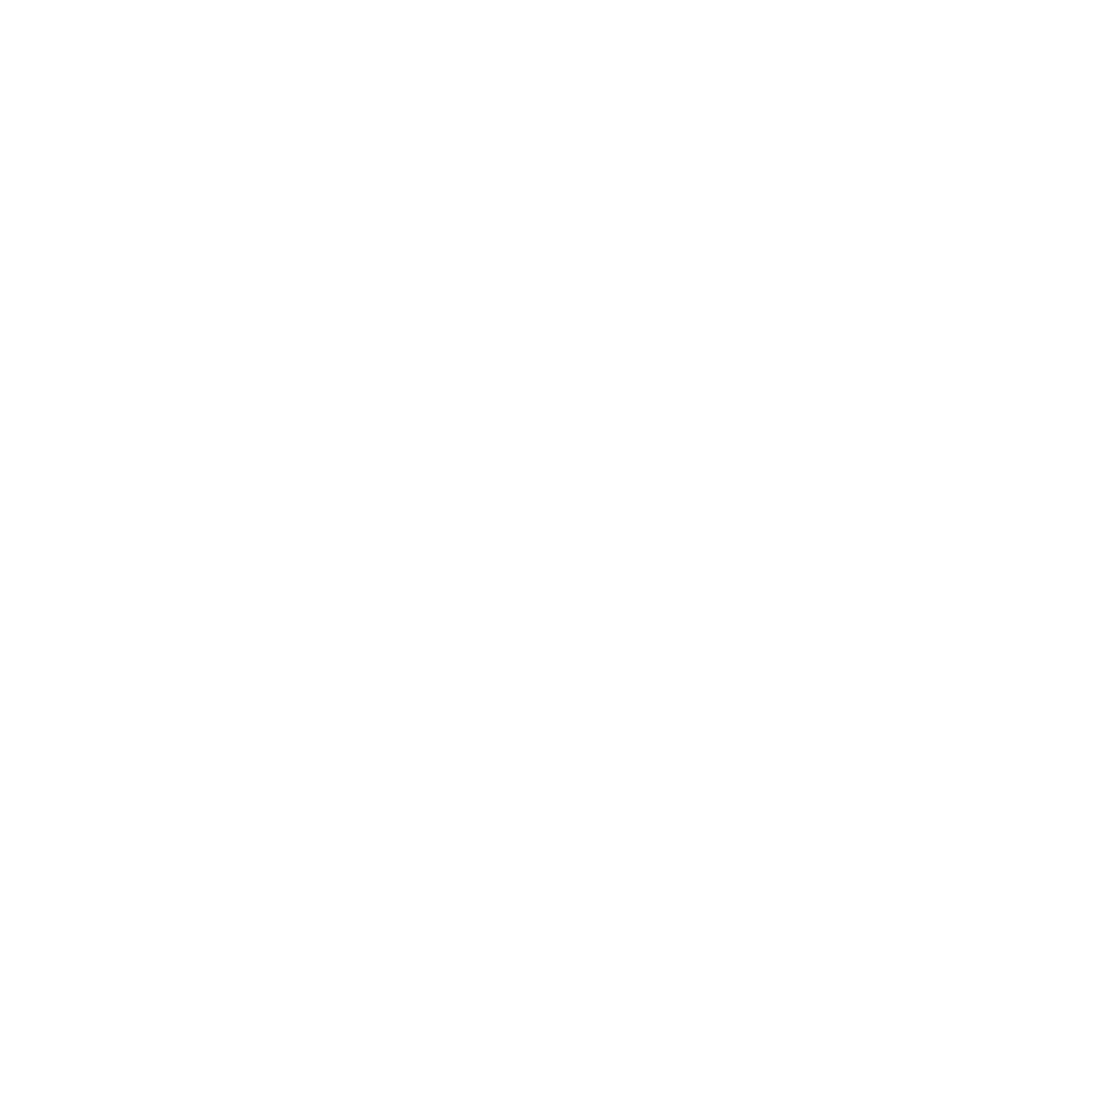

In [19]:
_ = plt.figure(figsize=(20, 20))
_ = ax = plt.gca()

_ = gdf[gdf['route'] == '59 ST to 113 ST'].plot(column='moddate', ax=ax, legend=True, cmap=plt.cm.tab20c_r)
_ = ax.axis('off')

In [21]:
gdf[gdf['route'] == 'PARK DR E to 164 ST']

Empty GeoDataFrame
Columns: [OBJECTID, segmentmil, SegmentID, LaneMiles, BikeID, Shape_Leng, OBJECTID_1, street, boro, facilitycl, fromstreet, tostreet, lasteditby, onoffst, allclasses, instdate, moddate, comments, bikedir, lanecount, ft_facilit, tf_facilit, geometry, route]
Index: []

[0 rows x 24 columns]

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.figure(figsize=(20, 20))
ax = plt.gca()
_ = gdf[gdf[''.plot(column='tf_facilit', ax=ax, legend=True)
_ = ax.set_title('NYC Bike Routes by Facility Type', size=24)
_ = ax.axis('off')

SyntaxError: invalid syntax (<ipython-input-22-7d569f04b54a>, line 7)

# Routes Colored by Facility Type

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.figure(figsize=(20, 20))
ax = plt.gca()
_ = gdf.plot(column='tf_facilit', ax=ax, legend=True)
_ = ax.set_title('NYC Bike Routes by Facility Type', size=24)
_ = ax.axis('off')

## Routes Colored By Year

In [ ]:
gdf['year'] = pd.to_datetime(gdf['date_instd']).dt.year

_ = plt.figure(figsize=(20, 20))
ax = plt.gca()
_ = gdf.plot(column='year', ax=ax, legend=True, cmap=plt.cm.cividis_r)
_ = ax.set_title('NYC Bike Routes by Year', size=24)
_ = ax.axis('off')

# Adding A Basemap 

We can use the `contextily` library to add a basemap. One thing we have to do first is convert the coordinate reference system of the dataframe from projected (epsg: 4326) to unprojected (epsh: 3857). This is done with a utility function on the geodataframe.

In [ ]:
web_gdf = gdf.to_crs(epsg=3857)
web_gdf.geometry[:2]

In [ ]:
web_gdf.crs

In [ ]:
gdf.crs

In [ ]:
plot_with_basemap(gdf, column='tf_facilit', zoom=12)

## Interactive Version

We can make the choosing the basemap and zoom level more interactive with IPython Widgets.

# Finding Length of Bike Routes

In [ ]:
example = gdf['geometry'].iloc[0]
list(example.coords)

Distance is 0.08 KM from https://www.geodatasource.com/distance-calculator

In [ ]:
example.length

In [ ]:
web_gdf['geometry'].iloc[0].length

In [ ]:
gdf[(gdf['fromstreet'] == 'W 16 ST') & (gdf['tostreet'] == 'W 31 ST')]

In [ ]:
from shapely.geometry import LineString
from math import radians, cos, sin, asin, sqrt

# Calculates distance between 2 GPS coordinates
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

distances = []
for line in gdf['geometry']:
    try:
        numCoords = len(line.coords) - 1
        distance = 0
        for i in range(0, numCoords):
            point1 = line.coords[i]
            point2 = line.coords[i + 1]
            distance += d(point1, point2).meters

        distances.append(distance)
    except: 
        continue
distances[:10]

In [ ]:
new = gdf.to_crs(epsg=32633)
new['geometry'].iloc[0].length

In [ ]:
gdf.iloc[0]

In [ ]:
from geopy import distance
from shapely.wkt import loads

line_wkt="LINESTRING(3.0 4.0, 3.1 4.1)"

# a number of other elipsoids are supported
distance.VincentyDistance.ELLIPSOID = 'WGS-84'
d = distance.distance

line = loads(line_wkt)

# convert the coordinates to xy array elements, compute the distance
dist = d(line.xy[0], line.xy[1])

print(dist.meters)

In [ ]:
d(example.coords[0], example.coords[1]).meters

In [ ]:
d(example.xy[0], example.xy[1]).meters

# Bringing in Plotly

Next, we will try our hand at using plotly, specifically plotly_express, for plotting an interactive version of this map. This will require a little work.

In [ ]:
import shapely.geometry as geometry

In [ ]:
gdf['geometry'].head(3)

In [ ]:
routes = []

point_lats = []
point_lons = []

types = []
lens = []

# Iterate through each row (a bike route)
for segment in gdf.itertuples():
    
    types.append(type(segment.geometry))
    
    # We will skip multi-line strings for now
    if isinstance(segment.geometry, geometry.multilinestring.MultiLineString):
        segment.geometry
        continue
    
    else:
        # Extract the points forming the line
        points = segment.geometry.xy
        # Record how many points are in the line
        lens.append(len(points[0]))
            
        # Iterate through the longitudes and latitudes making up the line
        for x, y in zip(points[0], points[1]):
            routes.append(segment.segment_id)
            point_lons.append(x)
            point_lats.append(y)
            
    
print(f'There are a total of {len(gdf)} routes.')
print(f'These routes are made up of a total of {len(routes)} points.')

In [ ]:
from collections import Counter

Counter(types)

In [ ]:
point_counts = pd.DataFrame.from_records(dict(Counter(lens)), index=[0]).T.reset_index().rename(columns={0: 'count', 'index': 'n_points'}).sort_values(by='n_points')
point_counts.head()

## Create DataFrame of Bike Routes

The next step is to make a dataframe which the columns contain the route id, the lat, and the lon making up the points in each route.

In [ ]:
df = pd.DataFrame(data=dict(segment_id=routes, lat=point_lats, lon=point_lons))
df.head()

We can join this back to the main dataframe to get metadata about the bike routes.

In [ ]:
df = df.merge(gdf, on='segment_id', how='left')[['segment_id', 'lat', 'lon', 'boro', 'ft_facilit', 'date_instd', 'street']]
df['date_instd'] = pd.to_datetime(df['date_instd'])
df = df.dropna()
df.info()

## Use Plotly Express

We'll import plotly express and authenticate with MapBox to use the geographic plotting capabilities.

In [ ]:
import plotly_express as px
px.set_mapbox_access_token(open('/Users/williamkoehrsen/mapbox_secret.txt').read())

In [ ]:
help(px.line_mapbox)

In [ ]:
fig = px.line_mapbox(
    df.iloc[:10000],
    lat="lat",
    lon="lon",
    color="ft_facilit",
    line_group="segment_id",
    title="NYC Bike Routes",
)

In [ ]:
from plotly.offline import plot
plot(fig)